In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#veri seti oluştur
#küme 1
x1=np.random.normal(25,5,20)# x için ortalama 25, standart sapma 5,1000 tane nokta
y1=np.random.normal(25,5,20)# y için
#küme 2
x2=np.random.normal(55,5,20)
y2=np.random.normal(60,5,20)
#küme 3
x3=np.random.normal(55,5,20)
y3=np.random.normal(15,5,20)
x=np.concatenate((x1,x2,x3),axis=0)# x noktalarını x değişkeninde birleştirdik
y=np.concatenate((y1,y2,y3),axis=0)

dictionary = {"x":x,"y":y}
data = pd.DataFrame(dictionary)
data.head()

,x,y
0,19.615333,18.824664
1,26.609883,27.971120
2,22.394545,30.494601
3,35.572238,33.015656
4,25.463278,20.281247


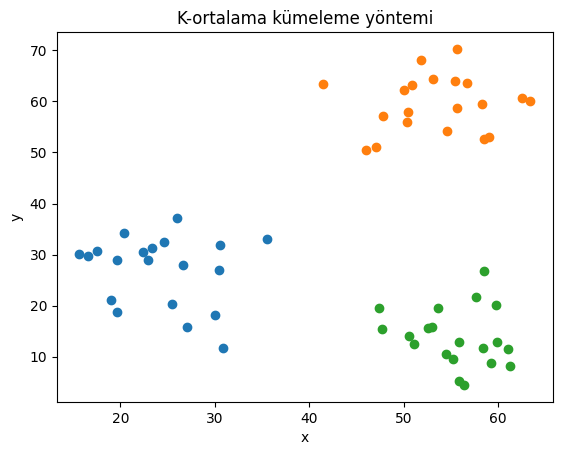

In [ ]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-ortalama kümeleme yöntemi")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

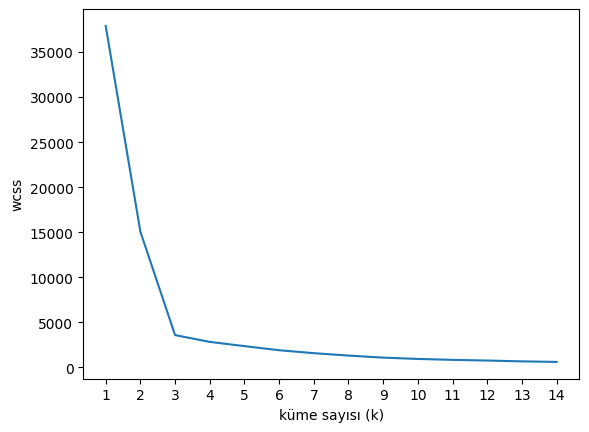

In [ ]:
# k değerinin belirlenmesi(elbow method-dirsek yöntemi)
from sklearn.cluster import KMeans
wcss=[]
for k in range (1,15):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.xlabel("küme sayısı (k)")
plt.ylabel("wcss")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

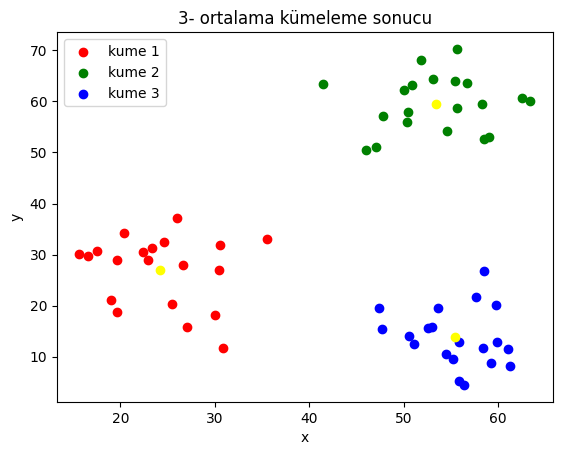

In [ ]:
k_ort = KMeans(n_clusters=3)
kumeler = k_ort.fit_predict(data)

data["label"] = kumeler

plt.figure()
plt.scatter(data.x[data.label == 0],data.y[data.label == 0],color="red", label = "kume 1")
plt.scatter(data.x[data.label == 1],data.y[data.label == 1],color="green",label = "kume 2")
plt.scatter(data.x[data.label == 2],data.y[data.label == 2],color="blue",label = "kume 3")
plt.scatter(k_ort.cluster_centers_[:,0],k_ort.cluster_centers_[:,1],color = "yellow")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3- ortalama kümeleme sonucu")
plt.show

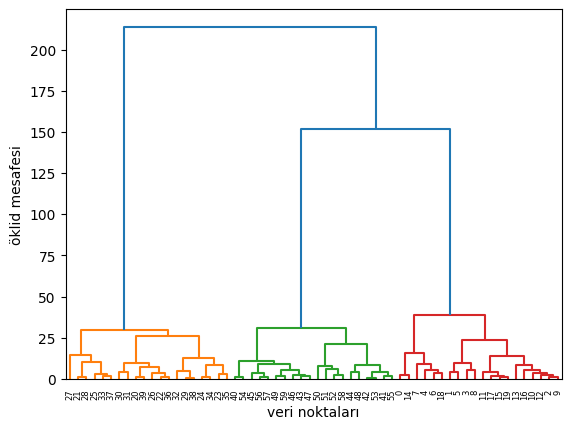

In [ ]:
#Dendogram Gösterimi
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(data,method="ward")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("veri noktaları")
plt.ylabel("öklid mesafesi")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


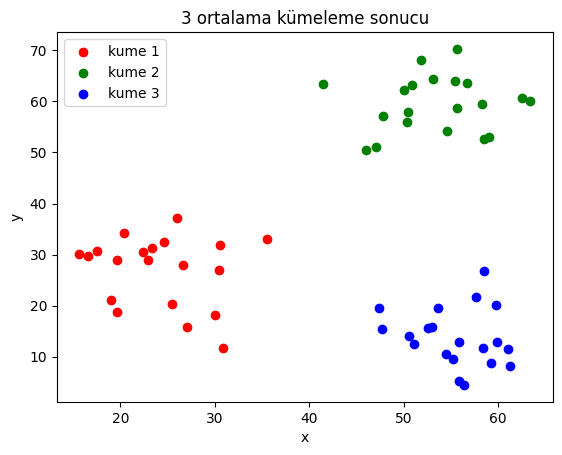

In [ ]:
#Hiyerarşik kümeleme algoritması - eğitim ve test
from sklearn.cluster import AgglomerativeClustering
hiyerarsi_kume = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage = "ward")
kume = hiyerarsi_kume.fit_predict(data)
data["label"] = kume

plt.figure()
plt.scatter(data.x[data.label == 0],data.y[data.label == 0],color = "red",label="kume 1")
plt.scatter(data.x[data.label == 1],data.y[data.label == 1],color = "green",label="kume 2")
plt.scatter(data.x[data.label == 2],data.y[data.label == 2],color = "blue",label="kume 3")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3 ortalama kümeleme sonucu")
plt.show()


**Iris veri seti:** sklearn kütüphanesi içinde bulunmaktadır. 3 adet sınıf ve bu sınıflara ait 4 adet özellik bulunmaktadır.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris #iris dataseti yükledik

In [ ]:
iris=load_iris()
data = iris.data
feature_names = iris.feature_names
y=iris.target
df = pd.DataFrame(data,columns=feature_names)
df["sinif"] = y # y değerlerini dataframe'e ekliyoruz
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Temel bileşen analizi:** temel bileşenlerden 2 tanesini elde edelim

In [ ]:
#PCA Principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2,whiten=True)#True dediğimiz için normalizasyon işlemi otomatik yapılıyor.
pca.fit(data)
x_pca = pca.transform(data)
print("variance ratio:",pca.explained_variance_ratio_)
print("sum: ",sum(pca.explained_variance_ratio_))

variance ratio: [0.92461872 0.05306648]
sum:  0.977685206318795


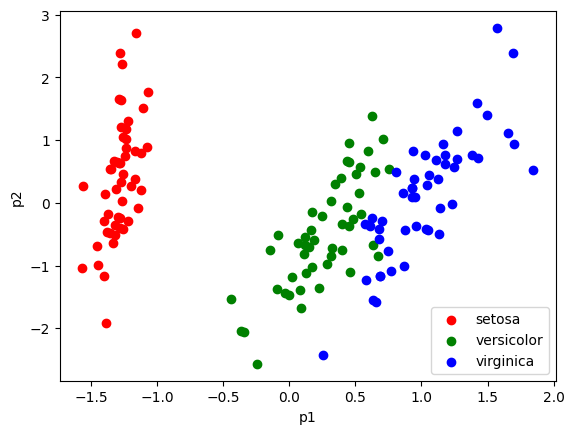

In [ ]:
#temel bileşenleri görselleştirelim
df["p1"] = x_pca[:,0]
df["p2"] = x_pca[:,1]
color = ["red","green","blue"]
for each in range (3):
  plt.scatter(df.p1[df.sinif==each],df.p2[df.sinif==each],color=color[each],label=iris.target_names[each]) # each döngünün 0-3 arasındaki değeri
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

setosa sınıfının diğer iki sınıftan ayrıldığını görüyoruz.

In [ ]:
#istatistiksel model seçimi
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X,y=load_iris(return_X_y=True)
X.shape

(150, 4)

In [ ]:
X_new = SelectKBest(chi2,k=2).fit_transform(X,y) # en iyi 2 eksen belirleniyor.
X_new.shape


(150, 2)

In [ ]:
# model temelli öznitelik seçimi
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
X,y=load_iris(return_X_y=True)
X.shape

(150, 4)

In [ ]:
#L1 normu temelli öznitelik seçimi (x1,y1) (x2,y2) için farklarının mutlak değerleri toplamı
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X,y)
model=SelectFromModel(lsvc,prefit=True)
X_new= model.transform(X)
X_new.shape

(150, 3)

In [ ]:
#L2 normu temelli öznitelik seçimi farklarının kareleri toplamının karekökü
lsvc = LinearSVC(C=0.01,penalty="l2",dual=False).fit(X,y)
model=SelectFromModel(lsvc,prefit=True)
X_new= model.transform(X)
X_new.shape

(150, 2)

In [ ]:
#ağaç temelli öznitelik seçimi
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X,y=load_iris(return_X_y=True)
X.shape

(150, 4)

In [ ]:
clf = ExtraTreesClassifier(n_estimators=50)  #50 farklı ağaç oluşturacak
clf=clf.fit(X,y)
clf.feature_importances_ # 4 farklı özelliğin herbirinin önem derecesini gösteriyor.

array([0.11572568, 0.08544723, 0.35236347, 0.44646361])

In [ ]:
#en önemli 2 özellik kalacak (3,4)
model=SelectFromModel(clf,prefit=True)
X_new= model.transform(X)
X_new.shape

(150, 2)